# Oval sports ball classifier 🏉

Based on the [Fast AI image classification tutorial](https://github.com/fastai/course-v3/blob/master/nbs/dl1/lesson2-download.ipynb)

In [0]:
# import required packages
import os
from fastai.vision import *
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### Create directory within Drive and upload url files into your server

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
# set the working directory
%cd /content/drive/My Drive/Colab Notebooks/data/balls

/content/drive/My Drive/Colab Notebooks/data/balls


Within your working folder you will need to create a folder to house each image class and store the txt file with image urls

In [0]:
!ls

american  australian  export.pkl  models  rugby


In [0]:
path = os.getcwd()
print(path)

/content/drive/My Drive/Colab Notebooks/data/balls


## Download images

In [0]:
classes = ['rugby','american','australian']

In [0]:
for i in range(0,len(classes),1):
  dest = path+"/"+classes[i]
  file = dest+"/"+"urls_"+classes[i]+".txt"
  download_images(file, dest, max_pics=250)

## View data

In [0]:
path = os.getcwd()
print(path)
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

/content/drive/My Drive/Colab Notebooks/data/balls


In [0]:
data.classes

['american', 'australian', 'rugby']

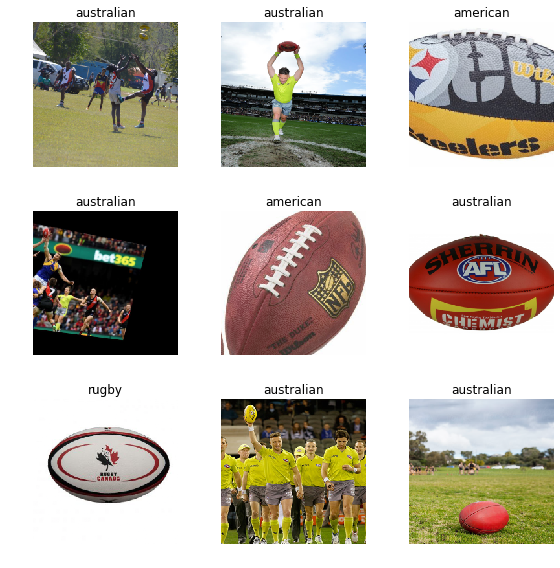

In [0]:
data.show_batch(rows=3, figsize=(8,8))

In [0]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['american', 'australian', 'rugby'], 3, 575, 143)

## Train model

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [0]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.248858,0.499748,0.174825,00:20
1,0.780114,0.272874,0.104895,00:20
2,0.575260,0.215730,0.076923,00:20
3,0.454638,0.193891,0.076923,00:20
4,0.377304,0.199719,0.083916,00:19
5,0.317762,0.200419,0.083916,00:20


In [0]:
learn.save('stage-1')

In [0]:
learn.unfreeze()

In [0]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


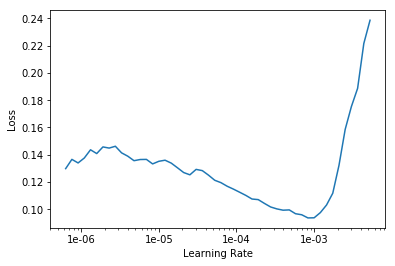

In [0]:
learn.recorder.plot()

In [0]:
learn.fit_one_cycle(6, max_lr=slice(1e-4, 1e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.146456,0.198471,0.083916,00:20
1,0.119669,0.196353,0.069930,00:21
2,0.099908,0.173368,0.062937,00:21
3,0.086536,0.176328,0.055944,00:20
4,0.072184,0.184270,0.055944,00:21
5,0.066055,0.180242,0.055944,00:20


In [0]:
learn.save('stage-2')

## Investigate model performance

In [0]:
learn.load('stage-2');

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

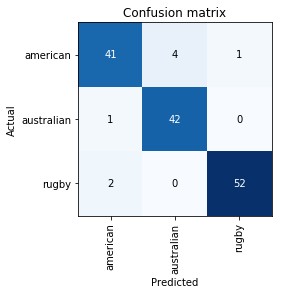

In [0]:
interp.plot_confusion_matrix()

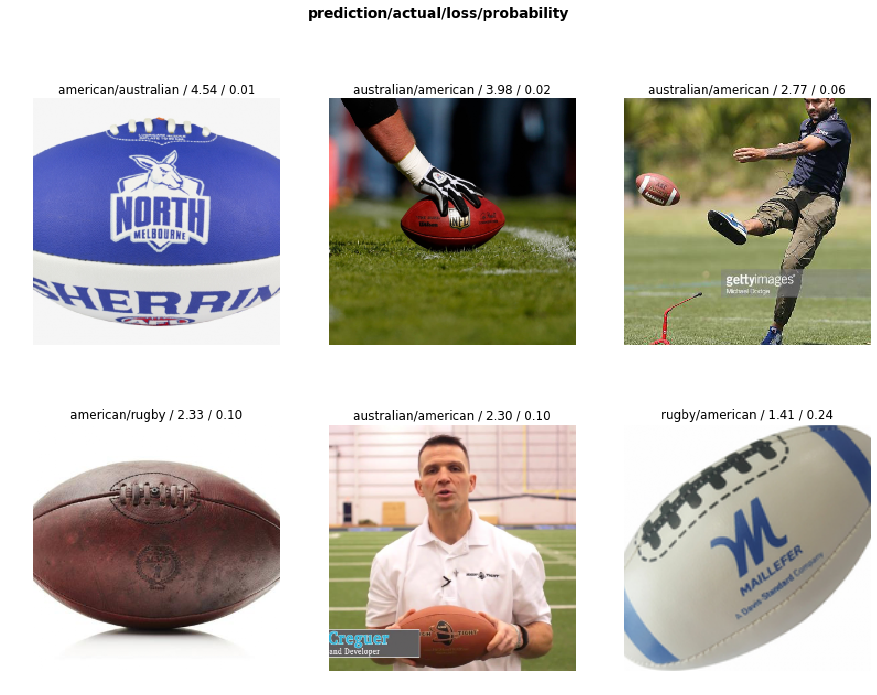

In [0]:
interp.plot_top_losses(6, figsize=(15,11), heatmap=False)

## Export model

In [0]:
learn.export()